In [137]:
# INTRODUCTION

In [138]:
#The Human Activity Recognition data set is shown here.
#It includes information from mobile sensors as well as a label for the particular human action
#(such as sitting, standing, or moving up or down stairs) that was occurring when the sensors were reading data.

In [139]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import seaborn as sns, pandas as pd, numpy as np

In [140]:
df = pd.read_csv("smartphone.csv", sep=',')

In [141]:
df.shape

(10299, 562)

In [142]:
##  Examining DataSet

In [143]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [144]:
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [145]:
df.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [146]:
# Activity is the only object  column.

In [147]:
df.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [148]:
df.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

In [149]:
# We can see that data are all scaled up from -1 (min) to 1(max).

In [150]:
df.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

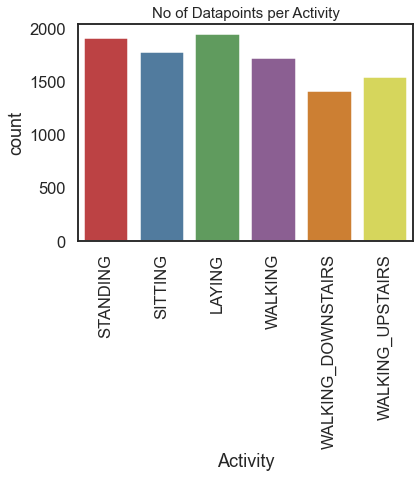

In [151]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(df.Activity)
plt.xticks(rotation=90)
plt.show()

In [152]:
# We have a very balanced balanced set. 

In [153]:
#Sparse matrices won't be accepted by Scikit Learn classifiers for the prediction column. 
# Therefore, LabelEncoder  must be used to turn the activity labels into integers,
# or the resultant matrix must be turned into a non-sparse array if DictVectorizer is employed.
# We will fit the "Activity" column using LabelEncoder, then examine 5 random values.

In [154]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Activity'] = le.fit_transform(df.Activity)
df['Activity'].sample(5)

4067    0
946     4
805     4
6363    0
1778    2
Name: Activity, dtype: int32

In [155]:
# Calculate the correlation values
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.036047,0.013241,-0.066233,0.027464,0.001902,-0.004984,0.027729,-0.002924,-0.009873,0.033533,...,-0.029273,0.042123,0.035684,-0.013009,0.010679,1.000000,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.002618,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,0.087571,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,-0.105752,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614


In [156]:
# And we see that the correlation between x and y is the same as the correlation between y and x.
# As a result, the whole bottom half of our matrix, including these values.
# It is not providing us with any new information.
# Because we already know that every single value will be in perfect connection with one another.

In [157]:
# So we want to remove these values.
# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560], dtype=int64),
 array([  0,   0,   1, ..., 558, 559, 560], dtype=int64))

In [158]:
# Calculate the correlation values
feature_cols = df.columns[:-1]
corr_values = df[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

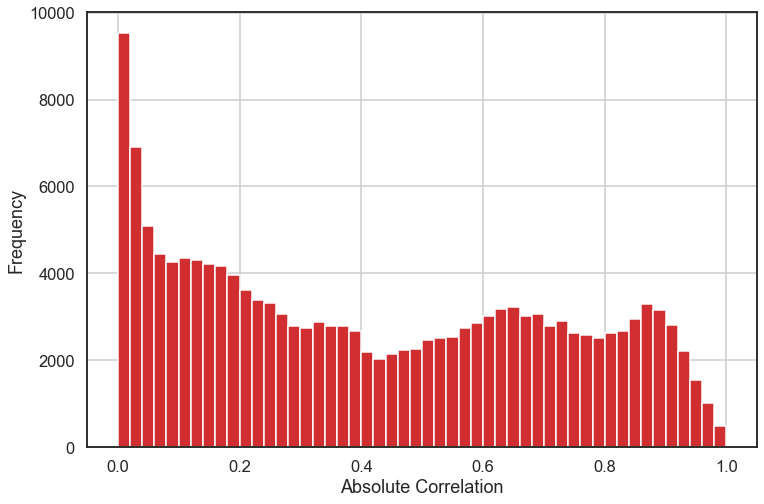

In [160]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [161]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [162]:
# Separate the data into sets for training and testing. You may accomplish this using any technique.
# Keep the same ratio of predictor classes, think about using Scikit-StratifiedShuffleSplit. 
# We will the ratio of classes in the train and test splits, regardless of the method used to divide the data.

In [163]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)
next(strat_shuf_split.split(df[feature_cols], df.Activity))


(array([1575, 1707, 6425, ..., 3037, 3002,  996], dtype=int64),
 array([7743,  969, 3175, ..., 8914, 8756, 1470], dtype=int64))

In [164]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(df[feature_cols], df.Activity))

# Create the dataframes
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'Activity']

X_test  = df.loc[test_idx, feature_cols]
y_test  = df.loc[test_idx, 'Activity']

In [165]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [166]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

In [167]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [168]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [169]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [170]:
# Comparing the magnitudes of the coefficients for each of the models.
# If one-vs-rest fitting was used, each set of coefficients can be plotted separately.

In [171]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
31  -0.062221  0.258954 -0.296062 -0.246105  0.026193  0.257929  0.000000   
48   0.090475  0.401701  0.792020 -0.221828  0.119333 -0.218020 -0.059560   
336  0.012760  0.211213  0.170317 -0.123425  0.175218  0.169581  0.021640   
523 -0.048727 -0.516775  0.832240  0.250363  0.164049  0.689149 -0.004359   
93   0.038343 -0.039503  0.344961 -0.515393  0.740662 -0.649554  0.000000   
202  0.082573  0.047831 -0.040833 -0.829970  0.545193 -0.552313  0.117962   
123 -0.020925 -0.038676  0.020856 -0.082708  0.187493  0.230981 -0.027128   
401 -0.007959  0.221205  0.128467  0.499886  0.162896 -0.169742 -0.174774   
320 -0.010244  0.168141  0.141566  0.039108  0.126101 -0.167563  0.000000   
159  0.621567  0.122912 -0.222115  0.923945 -1.323754  0.321862  1.810843   

                                                             l2            \
            1         2         3         4         5         0         1   
31   0.227156 -0.928071 -0.088921  0.000000  0.475686 -0.138194  1.108189   
48   0.231842  1.370392  0.000000  0.000000  0.116997  0.138789 -0.059457   
336  0.000000  0.000000  0.000000  0.216438  0.226203  0.002672  0.431228   
523 -0.577097  0.417873  0.000000  0.000000  2.477694 -0.035877 -0.089435   
93   0.000000  0.000000 -0.132780  1.303672 -1.159815  0.071124  0.046100   
202  0.000000  0.000000  0.000000  1.009210 -1.281819  0.158920  0.165346   
123  0.000000  0.000000  0.000000  0.000000  0.438351 -0.027025 -0.009547   
401  0.281509  0.000000  0.581676  0.033836 -0.160161 -0.033540  0.823154   
320  0.004949  0.000000  0.000000  0.000000  0.000000 -0.035193  0.633906   
159  0.312398 -0.476315  1.486711 -2.437214  0.518432  1.206058  0.415886   

                                             
            2         3         4         5  
31  -1.035391 -0.977675  0.081056  1.002596  
48   1.795397 -0.863177  0.474500 -0.465459  
336  0.247000 -0.343689  0.326965  0.322863  
523  1.516064  0.502269  0.645659  1.621010  
93   1.942602 -0.846714  3.207999 -1.820838  
202 -0.272770 -1.927748  1.764903 -1.126960  
123  0.322981 -0.327020  0.441147  0.559245  
401  0.147615  1.609964  0.719323 -0.516337  
320  0.224368  0.076746  0.610833 -0.501967  
159 -0.818985  2.350419 -3.881260  0.208175

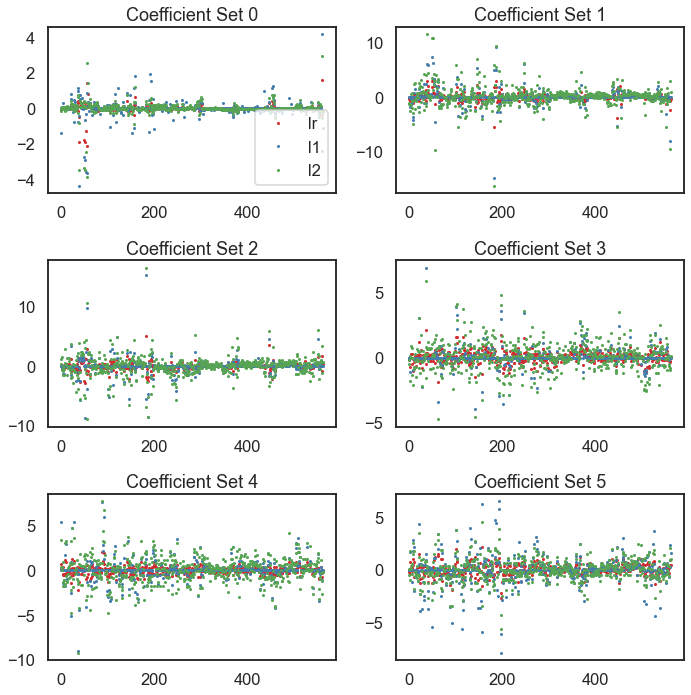

In [172]:
# We prepare six separate plots for each of the multi-class coefficients.

fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    df = coefficients.xs(loc, level=1, axis=1)
    df.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()


In [173]:
# We will predict and store the class for each model.
#Store the probability for the predicted class for each model.
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [174]:
y_prob.head()


,lr,l1,l2
0,0.998939,0.998974,0.999997
1,0.988166,0.999807,0.999999
2,0.987592,0.995726,0.999905
3,0.981337,0.999194,0.999870
4,0.998277,0.999922,0.999997


In [175]:
#Below we are displaying all rows which have different predicted classes by models "lr != l1"
# We can see this for all columns in a better way ploting confusion matrix.
y_pred[y_pred['lr']!=y_pred['l1']] 

,lr,l1,l2
88,2,1,1
197,2,1,1
296,1,2,2
388,1,2,1
430,4,5,5
489,2,1,1
769,4,3,3
853,5,3,3
1036,1,2,1
1071,1,2,2


In [176]:
# Calculate the following error metrics for each model:
#Recall
#F-score
#Accuracy
#Precision

#Confusion Matrix
#Decide how to combine the multi-class metrics into a single value for each model.

In [177]:
# We could see in detail the error metrics for the 3 models by using classification report:

from sklearn.metrics import classification_report
print('Classification report for Logistic regression without regularization:')
print(classification_report(y_test,y_pred['lr']))

print('Classification report for Logistic regression with L1(Lasso) regularization:')
print(classification_report(y_test,y_pred['l1']))
    
print('Classification report for Logistic regression with L2(Ridge) regularization:')
print(classification_report(y_test,y_pred['l2']))

Classification report for Logistic regression without regularization:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.96      0.96      0.96       533
           2       0.96      0.96      0.96       572
           3       1.00      1.00      1.00       517
           4       1.00      1.00      1.00       422
           5       1.00      1.00      1.00       463

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090

Classification report for Logistic regression with L1(Lasso) regularization:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.96      0.95      0.95       533
           2       0.95      0.96      0.96       572
           3       1.00      1.00      1.00       517
           4       1.00      1.00      

In [178]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [179]:
metrics


,lr,l1,l2
precision,0.984144,0.983835,0.984800
recall,0.984142,0.983819,0.984790
fscore,0.984143,0.983815,0.984788
accuracy,0.984142,0.983819,0.984790
auc,0.990384,0.990144,0.990741


In [180]:
# The confusion matrix for each model should be shown or shown.

In [181]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


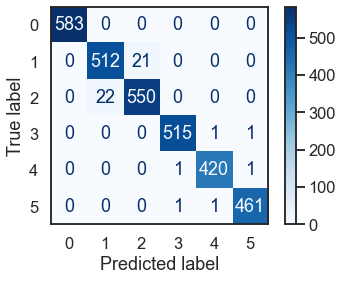

In [182]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm['lr'], display_labels=lr.classes_)
disp.plot(cmap='Blues')

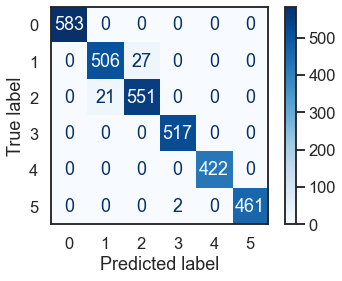

In [183]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm['l1'], display_labels=lr.classes_)
disp.plot(cmap='Blues')

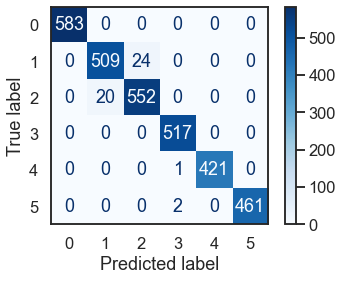

In [184]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm['l2'], display_labels=lr.classes_)
disp.plot(cmap='Blues')

In [185]:
le.inverse_transform([1,2])


array(['SITTING', 'STANDING'], dtype=object)

In [186]:
# The three confusion matrices show that all models have a small difficulty predicting classes 1 and 2. 
# It corresponds to the activities "SITTING" and "STANDING," respectively. 
# We assume that the similarity in measurement of angles or position is to blame for this.